In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [174]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
ss = pd.read_csv('data/sampleSubmission.csv')

In [175]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [176]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [177]:
ss.head()

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0


## Analysis

In [178]:
train.shape

(150150, 9)

In [179]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
record_ID          150150 non-null int64
week               150150 non-null object
store_id           150150 non-null int64
sku_id             150150 non-null int64
total_price        150149 non-null float64
base_price         150150 non-null float64
is_featured_sku    150150 non-null int64
is_display_sku     150150 non-null int64
units_sold         150150 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [181]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [182]:
len(train['store_id'].unique())

76

Total Stores are 76.

In [183]:
len(train['sku_id'].unique())

28

Total Products are 28.

In [184]:
train['is_featured_sku'].value_counts(normalize = True)

0    0.904389
1    0.095611
Name: is_featured_sku, dtype: float64

In [185]:
train['is_display_sku'].value_counts(normalize = True)

0    0.8668
1    0.1332
Name: is_display_sku, dtype: float64

In [186]:
train.week = pd.to_datetime(train.week) 
train.index = train.week 
# train = train.resample('D').mean() 

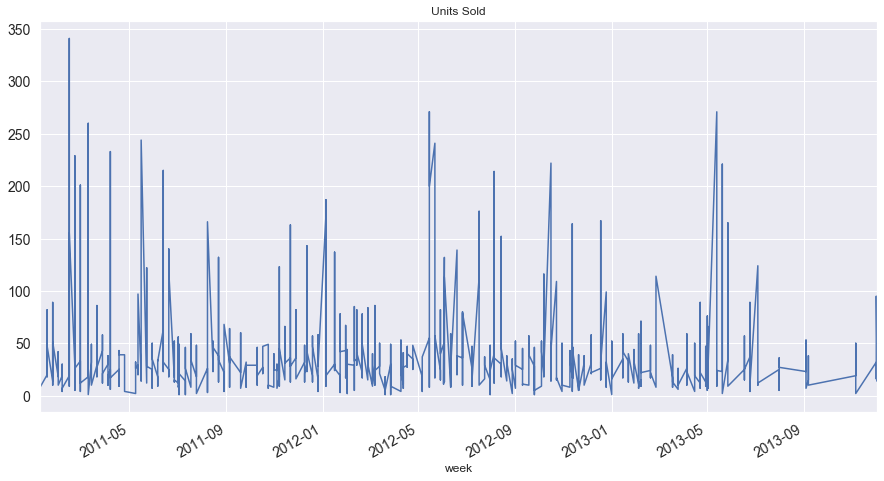

In [187]:
train[train.store_id == 8091 ].units_sold.plot(figsize=(15,8), title = 'Units Sold', fontsize=14)

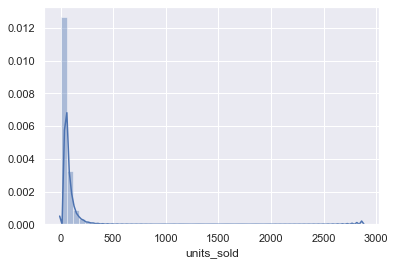

In [188]:
sns.distplot(train['units_sold'])

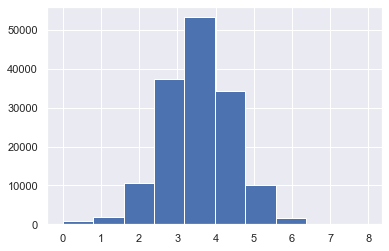

In [189]:
np.log(train['units_sold']).hist()

In [190]:
# train.groupby(['store_id', 'sku_id']).count()

In [191]:
# train.groupby(['store_id'])[['units_sold']].mean().plot()

In [192]:
# train.groupby(['sku_id'])[['units_sold']].mean().plot()

In [193]:
# train.groupby(['total_price'])[['units_sold']].mean().plot()

In [194]:
# train.groupby(['base_price'])[['units_sold']].mean().plot()

## Feature Engineering

In [195]:
train[train['total_price'].isnull()]['base_price']

week
2013-04-23    469.5375
Name: base_price, dtype: float64

In [196]:
temp = train[train['total_price'].isnull()]['base_price']
train['total_price'] = train['total_price'].fillna(temp)

In [197]:
test['units_sold'] = -1

train['label'] = 'train'
test['label'] = 'test'

final = pd.concat([train,test], sort = False)
final['week'] = pd.to_datetime(final.week)

In [198]:
final.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,label
2011-01-17 00:00:00,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,train
2011-01-17 00:00:00,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,train
2011-01-17 00:00:00,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,train
2011-01-17 00:00:00,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,train
2011-01-17 00:00:00,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,train


In [200]:
final.insert(0,'month',final['week'].apply(lambda x:x.month))
final.insert(0,'day',final['week'].apply(lambda x:x.day))
final.insert(0,'year',final['week'].apply(lambda x:x.year))

final.insert(0, 'month_start', final['week'].apply(lambda x: 1 if x.is_month_start else 0 ) )
final.insert(0, 'month_end', final['week'].apply(lambda x: 1 if x.is_month_end else 0 ) )

final.insert(0,'week_start',final['day'].apply(lambda x: 1 if x == 0 or x ==1 else 0 ) )
final.insert(0,'week_end',final['day'].apply(lambda x: 1 if x == 5 or x ==6 else 0 ) )

final.insert(0,'quarter_start',final['week'].apply(lambda x: 1 if x.is_quarter_start else 0 ) )
final.insert(0,'quarter_end',final['week'].apply(lambda x: 1 if x.is_quarter_end else 0 ) )

final.insert(0,'year_start',final['week'].apply(lambda x: 1 if x.is_year_start else 0 ) )
final.insert(0,'year_end',final['week'].apply(lambda x: 1 if x.is_year_end else 0 ) )

final.insert(0,'week_number', final['week'].apply(lambda x:x.isocalendar()[1]))

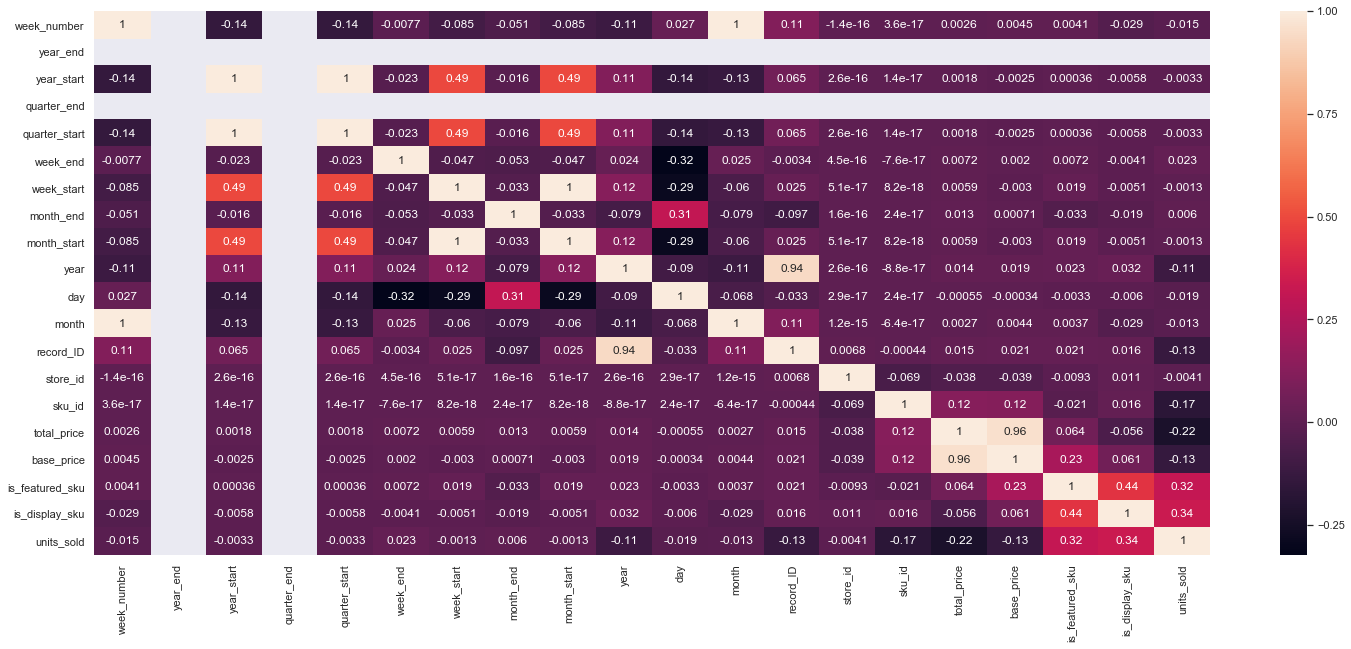

In [205]:
plt.figure(figsize = (25,10))
sns.heatmap(final.corr(), annot = True)
plt.show()

In [206]:
final1 = final.copy()

In [207]:
final1.reset_index(inplace = True)
final1 = final1.drop('index', axis = 1)

In [208]:
final1.head()

,week_number,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,year,...,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,label
0,3,0,0,0,0,0,0,0,0,2011,...,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,train
1,3,0,0,0,0,0,0,0,0,2011,...,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,train
2,3,0,0,0,0,0,0,0,0,2011,...,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,train
3,3,0,0,0,0,0,0,0,0,2011,...,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,train
4,3,0,0,0,0,0,0,0,0,2011,...,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,train


In [209]:
final1.columns

Index(['week_number', 'year_end', 'year_start', 'quarter_end', 'quarter_start',
       'week_end', 'week_start', 'month_end', 'month_start', 'year', 'day',
       'month', 'record_ID', 'week', 'store_id', 'sku_id', 'total_price',
       'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold',
       'label'],
      dtype='object')

In [210]:
columns = ['day','month']
for col in columns:
    final1[col+'_sin'] = np.sin((2*np.pi*final1[col])/max(final1[col]))
    final1[col+'_cos'] = np.cos((2*np.pi*final1[col])/max(final1[col]))
# final1 = final1.drop(columns, axis = 1)

In [211]:
final1.head()

,week_number,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,year,...,total_price,base_price,is_featured_sku,is_display_sku,units_sold,label,day_sin,day_cos,month_sin,month_cos
0,3,0,0,0,0,0,0,0,0,2011,...,99.0375,111.8625,0,0,20,train,-0.299363,-0.954139,0.5,0.866025
1,3,0,0,0,0,0,0,0,0,2011,...,99.0375,99.0375,0,0,28,train,-0.299363,-0.954139,0.5,0.866025
2,3,0,0,0,0,0,0,0,0,2011,...,133.9500,133.9500,0,0,19,train,-0.299363,-0.954139,0.5,0.866025
3,3,0,0,0,0,0,0,0,0,2011,...,133.9500,133.9500,0,0,44,train,-0.299363,-0.954139,0.5,0.866025
4,3,0,0,0,0,0,0,0,0,2011,...,141.0750,141.0750,0,0,52,train,-0.299363,-0.954139,0.5,0.866025


In [212]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

col = ['year']
lbl = LabelEncoder()
for c in col:
    final1[c] = lbl.fit_transform(final1[c])
    dumy = pd.get_dummies(final1[c], prefix = c, sparse = False)
    final1 = pd.concat([final1, dumy], axis = 1)
#     final1 = final1.drop(c, axis = 1)

In [213]:
MIN_MAX_COL = ['total_price', 'base_price']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
final1[MIN_MAX_COL] = scaler.fit_transform(final1[MIN_MAX_COL])

In [214]:
final1.columns

Index(['week_number', 'year_end', 'year_start', 'quarter_end', 'quarter_start',
       'week_end', 'week_start', 'month_end', 'month_start', 'year', 'day',
       'month', 'record_ID', 'week', 'store_id', 'sku_id', 'total_price',
       'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold',
       'label', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'year_0',
       'year_1', 'year_2'],
      dtype='object')

In [282]:
train = final1[final1['label'] == 'train']
test = final1[final1['label'] == 'test']

In [284]:
y = np.log(train['units_sold'])
X = train.drop(['record_ID', 'units_sold', 'label', 'week', 'day', 'month', 'year'], axis = 1)
col = X.columns
col

Index(['week_number', 'year_end', 'year_start', 'quarter_end', 'quarter_start',
       'week_end', 'week_start', 'month_end', 'month_start', 'store_id',
       'sku_id', 'total_price', 'base_price', 'is_featured_sku',
       'is_display_sku', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'year_0', 'year_1', 'year_2'],
      dtype='object')

## Modelling 

In [285]:
from sklearn.model_selection import train_test_split

from category_encoders.ordinal import OrdinalEncoder
from category_encoders import TargetEncoder, MEstimateEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

import statistics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [286]:
np.random.seed(42)
val_size = 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size)
print(X.shape)
print(X_train.shape)
print(X_val.shape)

(150150, 22)
(112612, 22)
(37538, 22)


### Linear Regression 

In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred_tr = reg.predict(X_train)
y_pred = reg.predict(X_val)
rmse_tr = sqrt(mean_squared_error(y_train, y_pred_tr))
rms = sqrt(mean_squared_error(y_val, y_pred))
rmsle = sqrt(mean_squared_log_error(y_val, y_pred))
rmse_tr, rms, rmsle

(0.7449968600608239, 0.7447134255391824, 0.18884586198171185)

In [49]:
reg.fit(X, y)
prediction = reg.predict(test[col])
prediction

array([3.79973253, 3.79782385, 3.73110144, ..., 3.90103176, 2.55085942,
       2.06795773])

In [50]:
prediction[prediction < 0] = 1
ss['units_sold'] = np.exp(prediction)
ss.to_csv('LR.csv', index = False)

#### Achieved 223 rank till here for private dashboard with score in public as  742.02 and 727.02 in private Leaderboard

### Random Forest regressor 

In [202]:
reg = RandomForestRegressor(random_state = 42, max_depth = 15, n_estimators = 400)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=400, random_state=42)

In [203]:
y_pred_tr = reg.predict(X_train)
y_pred = reg.predict(X_val)
rmse_tr = sqrt(mean_squared_error(y_train, y_pred_tr))
rms = sqrt(mean_squared_error(y_val, y_pred))
rmsle = sqrt(mean_squared_log_error(y_val, y_pred))
rmse_tr, rms, rmsle

(0.4218713508564322, 0.48976728932626334, 0.13537604443168338)

In [204]:
reg.fit(X, y)
prediction = reg.predict(test[col])
prediction

array([3.16941997, 3.36030789, 3.41678459, ..., 3.35538852, 2.34111854,
       2.27519195])

In [205]:
prediction[prediction < 0] = 1
ss['units_sold'] = np.exp(prediction)
ss.to_csv('RF.csv', index = False)

#### With Only day, month, year as datetime features and other given columns, and no hyperparameters in RF the score was 469.08 for public testcases and 502.25 for private testcases 

#### Now Score is 531.13 for public and 579.49 for private, need hyperparameter tuning... i think

### Light GBM 

In [51]:
%%time
def model(train_x, train_y, test_x, test_y, col):
#     params = {
#         'nthread': 10,
#         'max_depth': 5,
# #         'max_depth': 9,
#         'task': 'train',
#         'boosting_type': 'gbdt',
#         'objective': 'regression_l1',
#         'metric': 'mape', # this is abs(a-e)/max(1,a)
# #         'num_leaves': 39,
#         'num_leaves': 64,
#         'learning_rate': 0.2,
#        'feature_fraction': 0.9,
# #         'feature_fraction': 0.8108472661400657,
# #         'bagging_fraction': 0.9837558288375402,
#        'bagging_fraction': 0.8,
#         'bagging_freq': 5,
#         'lambda_l1': 3.097758978478437,
#         'lambda_l2': 2.9482537987198496,
# #       'lambda_l1': 0.06,
# #       'lambda_l2': 0.1,
#         'verbose': 1,
#         'min_child_weight': 6.996211413900573,
#         'min_split_gain': 0.037310344962162616,
#         }
    params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression_l1',
        'metric': 'mape', # this is abs(a-e)/max(1,a)
        'random_state' : 27,
        'max_depth' : 10,
        'n_estimators' : 500,
        'learning_rate': 0.1,
        'num_leaves': 100,
        'lambda_l1': 0.1,
        'lambda_l2': 0.1,
    }
    
    lgb_train = lgb.Dataset(train_x, train_y)
    lgb_valid = lgb.Dataset(test_x, test_y)
    model = lgb.train(params, lgb_train, 3000, valid_sets = [lgb_train, lgb_valid], early_stopping_rounds=50, verbose_eval=50)
    return model 

Wall time: 0 ns


In [52]:
%%time
model = model(X_train, y_train, X_val, y_val, col)

C:\Users\rajat\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[50]	training's mape: 0.126122	valid_1's mape: 0.12788
[100]	training's mape: 0.113227	valid_1's mape: 0.116485
[150]	training's mape: 0.107112	valid_1's mape: 0.111683
[200]	training's mape: 0.103223	valid_1's mape: 0.109045
[250]	training's mape: 0.100578	valid_1's mape: 0.107302
[300]	training's mape: 0.0985331	valid_1's mape: 0.106143
[350]	training's mape: 0.0968885	valid_1's mape: 0.105328
[400]	training's mape: 0.0955629	valid_1's mape: 0.10462
[450]	training's mape: 0.0944732	valid_1's mape: 0.104169
[500]	training's mape: 0.0934733	valid_1's mape: 0.103729
Did not meet early stopping. Best iteration is:
[500]	training's mape: 0.0934733	valid_1's mape: 0.103729
Wall time: 21.2 s


In [53]:
y_pred_tr = model.predict(X_train)
y_pred = model.predict(X_val)
rmse_tr = sqrt(mean_squared_error(y_train, y_pred_tr))
rms = sqrt(mean_squared_error(y_val, y_pred))
rmsle = sqrt(mean_squared_log_error(y_val, y_pred))
rmse_tr, rms, rmsle

(0.3674871324399622, 0.395007342592814, 0.11878041810676676)

In [137]:
params_lgbm = {
        'boosting_type': 'gbdt',
        'objective': 'regression_l1',
        'metric': 'mape', # this is abs(a-e)/max(1,a)
        'random_state' : 27,
        'max_depth' : 10,
        'n_estimators' : 500,
        'learning_rate': 0.1,
        'num_leaves': 100,
        'lambda_l1': 0.1,
        'lambda_l2': 0.1,
    }

# bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
#               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
#               importance_type='split', learning_rate=0.1, max_depth=30,
#               min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
#               min_split_gain=0.0001, n_estimators=200, n_jobs=-1,
#               num_leaves=1200, objective=None, random_state=None, reg_alpha=0.0,
#               reg_lambda=0.0, silent=True, subsample=1.0,
#               subsample_for_bin=200000, subsample_freq=0

model_lgb = lgb.LGBMRegressor(**params_lgbm)
model_lgb.fit(X, y)

In [55]:
prediction = model_lgb.predict(test[col])
prediction

array([3.39235657, 3.191977  , 3.13019596, ..., 3.30951721, 2.37876707,
       2.20798192])

In [56]:
prediction[prediction < 0] = 1
ss['units_sold'] = np.exp(prediction)
ss.to_csv('LGBM.csv', index = False)

#### Achieved 32 rank till here for private dashboard with score in public as  413.49 and 453.31 in private Leaderboard

In [47]:
cat_cols = ['is_featured_sku', 'is_display_sku', 'store_id', 'sku_id']

In [52]:
def runLGB(Xtrain, ytrain, Xval, yval, cat_cols, Xtest = None):
    params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
    'max_depth': 20, 
    'learning_rate': 0.1,
    'verbose': 1,
    'min_data_in_leaf' : 10,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.1,
#     'random_state' : 42,
#     'n_estimators' : 500,
    'num_leaves': 300,
    }

    n_estimators = 800
    early_stopping_rounds = 10

    d_train = lgb.Dataset(Xtrain.copy(), label=ytrain.copy(), categorical_feature=cat_cols)
    d_valid = lgb.Dataset(Xval.copy(), label=yval.copy(), categorical_feature=cat_cols)
    watchlist = [d_train, d_valid]

    model = lgb.train(params, d_train, n_estimators
                      , valid_sets = [d_train, d_valid]
                      , verbose_eval=n_estimators
                      , early_stopping_rounds=early_stopping_rounds)
    
    preds = model.predict(Xval, num_iteration=model.best_iteration)
    err = sqrt(mean_squared_log_error(yval, preds))
    
    preds_test = model.predict(Xtest, num_iteration = model.best_iteration)
    return  preds, err, np.exp(preds_test), model

In [53]:
pred_val, err, pred_test, model = runLGB(X_train, y_train, X_val, y_val, cat_cols, test[col])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[311]	training's l1: 0.17781	valid_1's l1: 0.262002


In [54]:
model, err

(<lightgbm.basic.Booster at 0x1970961e240>, 0.1094882721138233)

In [55]:
ss['units_sold'] = pred_test
ss.to_csv('LGBM.csv', index = False)

In [56]:
a = model.feature_importance(importance_type = 'split')
feature = pd.DataFrame(model.feature_name(), columns = ['feature'])
feature['importance'] = a
feature = feature.sort_values(by = ['importance'], ascending = False)
feature.head(15)

,feature,importance
11,total_price,18131
9,store_id,12171
12,base_price,11958
0,week_number,11310
15,day_sin,10525
16,day_cos,7442
10,sku_id,5658
18,month_cos,3485
17,month_sin,3483
19,year_0,2112


#### Achieved 17 rank till here for private dashboard with score in public as 407.4 and 444.5 in private Leaderboard

### Adding more Features related to Datetime

In [292]:
add_datetime_df = pd.DataFrame(None , columns = ['day_of_year'])

In [293]:
add_datetime_df_test = pd.DataFrame(None , columns = ['day_of_year'])

In [294]:
add_datetime_df.head()

,day_of_year


In [295]:
add_datetime_df['day_of_year'] = train['week'].apply(lambda x: x.dayofyear)
add_datetime_df['day_of_week'] = train['week'].apply(lambda x: x.weekday())

lbl_season = ['Winter', 'Spring', 'Summer', 'Fall']
add_datetime_df['season'] = pd.cut(train['month'], bins = [1,2, 5,8,11], labels = lbl_season)
add_datetime_df['season'] = add_datetime_df['season'].fillna('Winter')


lbl_month = ['beg', 'mid', 'end']
add_datetime_df['month_time'] = pd.cut(train['month'], bins = [0, 7, 24, 31], labels = lbl_month)

lbl_weekend = ['weekdays', 'weekend']
add_datetime_df['week_time'] = pd.cut(add_datetime_df['day_of_week'], bins = [-1, 4, 6], labels = lbl_weekend)



add_datetime_df_test['day_of_year'] = test['week'].apply(lambda x: x.dayofyear)
add_datetime_df_test['day_of_week'] = test['week'].apply(lambda x: x.weekday())

lbl_season = ['Winter', 'Spring', 'Summer', 'Fall']
add_datetime_df_test['season'] = pd.cut(test['month'], bins = [1,2, 5,8,11], labels = lbl_season)
add_datetime_df_test['season'] = add_datetime_df_test['season'].fillna('Winter')

lbl_month = ['beg', 'mid', 'end']
add_datetime_df_test['month_time'] = pd.cut(test['month'], bins = [0, 7, 24, 31], labels = lbl_month)

lbl_weekend = ['weekdays', 'weekend']
add_datetime_df_test['week_time'] = pd.cut(add_datetime_df_test['day_of_week'], bins = [-1, 4, 6], labels = lbl_weekend)

In [ ]:
# le = OrdinalEncoder()
# add_datetime_df['week_1'] = le.fit_transform(add_datetime_df['week'])
# add_datetime_df_test['week_1'] = le.fit_transform(add_datetime_df_test['week'])

# #Creating week number feature
# add_datetime_df['week_num'] = add_datetime_df.week_1%52
# add_datetime_df_test['week_num'] = add_datetime_df_test.week_1%52

# add_datetime_df['week_num1'] = add_datetime_df.week_1%4
# add_datetime_df_test['week_num1'] = add_datetime_df_test.week_1%4

# # Encoding 'week' it using sine and cosine transform; considering it as a cyclic feature 
# add_datetime_df['week_sin'] = np.sin(2 * np.pi * add_datetime_df['week_1'] / 52.143)
# add_datetime_df_test['week_cos'] = np.cos(2 * np.pi * add_datetime_df_test['week_1'] / 52.143)

In [298]:
col = ['season', 'month_time', 'week_time']
lbl = LabelEncoder()
for c in col:
    add_datetime_df[c] = lbl.fit_transform(add_datetime_df[c])
    dumy = pd.get_dummies(add_datetime_df[c], prefix = c, sparse = False)
    add_datetime_df = pd.concat([add_datetime_df, dumy], axis = 1)
    
col = ['season', 'month_time', 'week_time']
lbl = LabelEncoder()
for c in col:
    add_datetime_df_test[c] = lbl.fit_transform(add_datetime_df_test[c])
    dumy = pd.get_dummies(add_datetime_df_test[c], prefix = c, sparse = False)
    add_datetime_df_test = pd.concat([add_datetime_df_test, dumy], axis = 1)

In [300]:
col = ['week_number', 'year_end', 'year_start', 'quarter_end', 'quarter_start',
       'week_end', 'week_start', 'month_end', 'month_start', 'store_id',
       'sku_id', 'total_price', 'base_price', 'is_featured_sku',
       'is_display_sku', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'year_0', 'year_1', 'year_2']

In [301]:
col_to_use = col + ['day_of_year', 'day_of_week', 'season_0', 'season_1', 'season_2', 'season_3', 'month_time_0',\
       'month_time_1', 'week_time_0', 'week_time_1']

In [303]:
train = pd.concat([train, add_datetime_df], axis = 1)
test = pd.concat([test, add_datetime_df_test], axis = 1)

In [306]:
X = train[col_to_use]
y = np.log(train['units_sold']) # Transforming target into normal via logarithmic operation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(120120, 32) (120120,) (30030, 32) (30030,)


In [307]:
new_cat_cols = ['year_end', 'year_start', 'quarter_end', 'quarter_start',\
'week_end', 'week_start', 'month_end', 'month_start',\
'year_0', 'year_1', 'year_2', 'season_0',\
'season_1', 'season_2', 'season_3', 'month_time_0', 'month_time_1',\
'week_time_0', 'week_time_1']

In [308]:
cat_cols_to_use = cat_cols + new_cat_cols

In [318]:
def runLGB(Xtrain, ytrain, Xval, yval, cat_cols, Xtest = None):
    params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
#     'max_depth': 20, 
    'learning_rate': 0.1,
    'verbose': 1,
    'min_data_in_leaf' : 10,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.1,
#     'random_state' : 42,
#     'n_estimators' : 500,
#     'num_leaves': 300,
    }

    n_estimators = 800
    early_stopping_rounds = 10

    d_train = lgb.Dataset(Xtrain.copy(), label=ytrain.copy(), categorical_feature=cat_cols_to_use)
    d_valid = lgb.Dataset(Xval.copy(), label=yval.copy(), categorical_feature=cat_cols_to_use)
    watchlist = [d_train, d_valid]

    model = lgb.train(params, d_train, n_estimators
                      , valid_sets = [d_train, d_valid]
                      , verbose_eval=n_estimators
                      , early_stopping_rounds=early_stopping_rounds)
    
    preds = model.predict(Xval, num_iteration=model.best_iteration)
    err = sqrt(mean_squared_log_error(yval, preds))
    
    preds_test = model.predict(Xtest, num_iteration = model.best_iteration)
    return  preds, err, np.exp(preds_test), model

In [319]:
pred_val, err, pred_test, model = runLGB(X_train, y_train, X_val, y_val, cat_cols, test[col_to_use])

Training until validation scores don't improve for 10 rounds
[800]	training's l1: 0.228506	valid_1's l1: 0.264128
Did not meet early stopping. Best iteration is:
[800]	training's l1: 0.228506	valid_1's l1: 0.264128


In [320]:
err

0.10886374361561814

In [321]:
ss['units_sold'] = pred_test
ss.to_csv('LGBM.csv', index = False)

#### This has not given satisfactorily results.

### SKU based Model Fitting With LGBM

In [322]:
train['difference'] = train['base_price'] - train['total_price']
test['difference'] = test['base_price'] - test['total_price']

train['relative_base_price'] = train['total_price']/train['base_price']
test['relative_base_price'] = test['total_price']/test['base_price']
train['relative_total_price'] = train['base_price']/train['total_price']
test['relative_total_price'] = test['base_price']/test['total_price']

In [330]:
col_to_use_sku = col + ['difference', 'relative_base_price', 'relative_total_price', 'store_encoded', 'sku_encoded']

In [324]:
encoder = MEstimateEncoder()
encoder.fit(train['store_id'], train['units_sold'])
train['store_encoded'] = encoder.transform(train['store_id'], train['units_sold'])
encoder.fit(train['sku_id'], train['units_sold'])
train['sku_encoded'] = encoder.transform(train['sku_id'], train['units_sold'])

In [325]:
encoder = MEstimateEncoder()
encoder.fit(test['store_id'], test['units_sold'])
test['store_encoded'] = encoder.transform(test['store_id'], test['units_sold'])
encoder.fit(test['sku_id'], test['units_sold'])
test['sku_encoded'] = encoder.transform(test['sku_id'], test['units_sold'])

In [329]:
train.head()

,week_number,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,year,...,month_time_0,month_time_1,week_time_0,week_time_1,difference,relative_base_price,relative_total_price,store_encoded,sku_encoded,week_1
0,3,0,0,0,0,0,0,0,0,0,...,1,0,1,0,-0.009811,1.097146,0.911455,8091,216418,2011-01-17
1,3,0,0,0,0,0,0,0,0,0,...,1,0,1,0,-0.035416,1.469762,0.680382,8091,216419,2011-01-17
2,3,0,0,0,0,0,0,0,0,0,...,1,0,1,0,-0.032746,1.225691,0.815866,8091,216425,2011-01-17
3,3,0,0,0,0,0,0,0,0,0,...,1,0,1,0,-0.032746,1.225691,0.815866,8091,216233,2011-01-17
4,3,0,0,0,0,0,0,0,0,0,...,1,0,1,0,-0.032201,1.202120,0.831863,8091,217390,2011-01-17


In [336]:
def sku_model(model, col_to_use_sku):
    sub = pd.DataFrame(None, columns = ['record_ID', 'units_sold'])
    res_err = []
    skus = train['sku_id'].unique()
    for sku in skus:
        X = train[train['sku_id'] == sku][col_to_use_sku]
        y = np.log(train[train['sku_id'] == sku]['units_sold'])
        
        Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.2, random_state = 42)
        model.fit(X, y)
    
        y_pred = model.predict(Xval)
        err = sqrt(mean_squared_log_error(np.exp(yval), np.exp(y_pred)))
        res_err.append(err)
        
        print(f'RMSLE for {sku} is: {err}')
        
        preds = model.predict(test[test['sku_id'] == sku][col_to_use_sku])    
        temp_df =  pd.DataFrame.from_dict({'record_ID': test[test['sku_id'] == sku]['record_ID'], 'units_sold':  np.exp(preds)})
        sub = sub.append(temp_df)
    print("average Error", statistics.mean(res_err))
    return sub

In [338]:
params_lgbm = {
        'boosting_type': 'gbdt',
        'objective': 'regression_l1',
        'metric': 'l1', # this is abs(a-e)/max(1,a)
        'random_state' : 42,
#         'max_depth' : 10,
        'n_estimators' : 800,
        'min_data_in_leaf' : 10,
        'learning_rate': 0.1,
#         'num_leaves': 100,
#         'lambda_l1': 0.1,
#         'lambda_l2': 0.1,
    }

model_lgb = lgb.LGBMRegressor(**params_lgbm)
# temp = train.drop(['record_ID', 'store_id', 'sku_id', 'units_sold', 'label'], axis =1)
sub = sku_model(model_lgb, col_to_use_sku)
sub.sort_values(by = ['record_ID']).to_csv('sub_sku_RF_v2.csv', index = False)

RMSLE for 216418 is: 0.23447741993384866
RMSLE for 216419 is: 0.24447620259891073
RMSLE for 216425 is: 0.27372743928193694
RMSLE for 216233 is: 0.23006736023359825
RMSLE for 217390 is: 0.23458552414319422
RMSLE for 219009 is: 0.2050738944504378
RMSLE for 219029 is: 0.2532923231121506
RMSLE for 223245 is: 0.2751743635767299
RMSLE for 223153 is: 0.2764528295835078
RMSLE for 300021 is: 0.261283303787235
RMSLE for 219844 is: 0.28011472907860113
RMSLE for 222087 is: 0.2245395680780116
RMSLE for 320485 is: 0.2569222324904345
RMSLE for 378934 is: 0.30050038985017913
RMSLE for 222765 is: 0.2910546929329972
RMSLE for 245387 is: 0.32377854576264836
RMSLE for 245338 is: 0.3143259284844529
RMSLE for 547934 is: 0.32794305946006547
RMSLE for 300291 is: 0.28157441912612513
RMSLE for 217217 is: 0.32451616851627985
RMSLE for 217777 is: 0.29697425583073267
RMSLE for 398721 is: 0.32639021162208925
RMSLE for 679023 is: 0.2500489241109736
RMSLE for 546789 is: 0.20809040511970667
RMSLE for 600934 is: 0.2661

#### Not Good Results..